# Classification dataset

In [172]:
import numpy as np
import pandas as pd

In [174]:
np.random.seed(0)

In [175]:
attr1 = np.random.uniform(0, 1, 10000)
attr2 = np.random.uniform(0, 1, 10000)
attr3 = np.random.uniform(0, 1, 10000)
attr4 = attr1 * attr2 + np.random.uniform(0, 0.1, 10000)
attr5 = attr3 + np.random.uniform(0, 0.2, 10000)
attr6 = (attr2 + attr5) / 2 + np.random.uniform(-0.1, 0.1, 10000)

In [176]:
X = np.vstack([attr1, attr2, attr3, attr4, attr5, attr6]).T

In [177]:
y = np.where((attr4 + attr6) > 1.5, 2, np.where((attr2 + attr3) > 1, 1, 0))

In [178]:
data = pd.DataFrame(X, columns=['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6'])
data['Label'] = y

In [179]:
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Label
0,0.548814,0.748268,0.392173,0.486472,0.466024,0.568675,1
1,0.715189,0.180203,0.041157,0.179211,0.083422,0.044213,0
2,0.602763,0.389023,0.923301,0.252191,1.018682,0.801609,1
3,0.544883,0.037600,0.406235,0.103741,0.422682,0.273959,0
4,0.423655,0.011788,0.944282,0.056676,0.991814,0.553315,0


In [180]:
data.to_csv("classification_dataset.csv", index=False)

# Regression Dataset

In [23]:
import numpy as np
import pandas as pd

In [24]:
np.random.seed(0)

In [27]:
features = np.random.randn(10000,6)

In [90]:
x1, x2, x3, x4, x5, x6 = features.T

In [141]:
y = (
    2 * x1 +
    1.5 * x2 +
    2 * x3 +
    5 * x6
)

In [142]:
columns = [f"Feature_{i+1}" for i in range(6)]
df = pd.DataFrame(features, columns=columns)
df['Target'] = y

In [143]:
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target
0,-1.599384,1.076123,-1.477571,-0.612002,0.742937,0.088608,-4.096685
1,1.079000,1.417498,-0.813872,0.167101,-0.311386,0.442562,4.869310
2,-1.490530,2.177083,-0.105334,0.028074,0.730689,-1.587052,-7.861366
3,-0.421692,1.283083,-0.712493,-2.094723,1.363029,0.224563,0.779068
4,0.124857,1.056683,-0.066770,1.739526,1.392284,0.217775,2.790072


In [145]:
df.to_csv("regression_dataset.csv", index=False)

# Clustering Dataset

In [44]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture

In [45]:
np.random.seed(0)

In [47]:
X = np.random.randn(10000, 6)

In [56]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)
features, _ = gmm.sample(10000)

In [57]:
import pandas as pd
df = pd.DataFrame(features, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6'])


In [58]:
print(df.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6
0  -1.599384   1.076123  -1.477571  -0.612002   0.742937   0.088608
1   1.079000   1.417498  -0.813872   0.167101  -0.311386   0.442562
2  -1.490530   2.177083  -0.105334   0.028074   0.730689  -1.587052
3  -0.421692   1.283083  -0.712493  -2.094723   1.363029   0.224563
4   0.124857   1.056683  -0.066770   1.739526   1.392284   0.217775


# Non Linear Regression model

In [158]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [159]:
df = pd.read_csv("/content/regression_dataset.csv")

In [200]:
X = df.iloc[:, 0:6].values
y = df.iloc[:, 6].values

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [202]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [203]:
poly_features = PolynomialFeatures(degree=1)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

In [204]:
non_linear_model = LinearRegression()
non_linear_model.fit(X_train_poly, y_train)
y_pred_non_linear = non_linear_model.predict(X_test_poly)

In [205]:
print("\nNon-linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_non_linear))
print("R2 Score:", r2_score(y_test, y_pred_non_linear))


Non-linear Regression:
MSE: 0.10785800448541297
R2 Score: 0.7031340284508039


# Classification data


In [185]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [194]:
import pandas as pd

df = pd.read_csv("/content/classification_dataset.csv")

X = df.iloc[:, 0:6].values
y = df.iloc[:, 6].values
y


array([1, 0, 1, ..., 1, 1, 1])

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [196]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [197]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

In [198]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

In [199]:
results_df = pd.DataFrame(results).T
print(results_df)

                          Accuracy  Precision    Recall  F1 Score
Logistic Regression       0.995333   0.995337  0.995333  0.995334
K-Nearest Neighbors       0.954667   0.954641  0.954667  0.954641
Support Vector Machine    0.980333   0.980364  0.980333  0.980338
Random Forest Classifier  0.971333   0.971366  0.971333  0.971322
Decision Tree Classifier  0.957333   0.957493  0.957333  0.957378


# Loading data and splitting test and train

In [206]:
df = pd.read_csv("/content/classification_dataset.csv")

X = df.iloc[:, 0:6].values
y = df.iloc[:, 6].values
y

array([1, 0, 1, ..., 1, 1, 1])

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# SKlearn lib data normalization

In [209]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [210]:
housing = fetch_california_housing()

In [212]:
X = housing.data
y = housing.target

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [214]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Data Wrangling Techniques

Incomplete as of now


# image and audio handling

In [217]:
from scipy.io import wavfile
from IPython.display import Audio

In [216]:
rate, snd = wavfile.read("/content/audio.wav")

In [218]:
Audio(rate=rate,data=snd)

error: ushort format requires 0 <= number <= (0x7fff * 2 + 1)

<ipython-input-219-b8929551c9ac>:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png','pdf')


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:7939: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


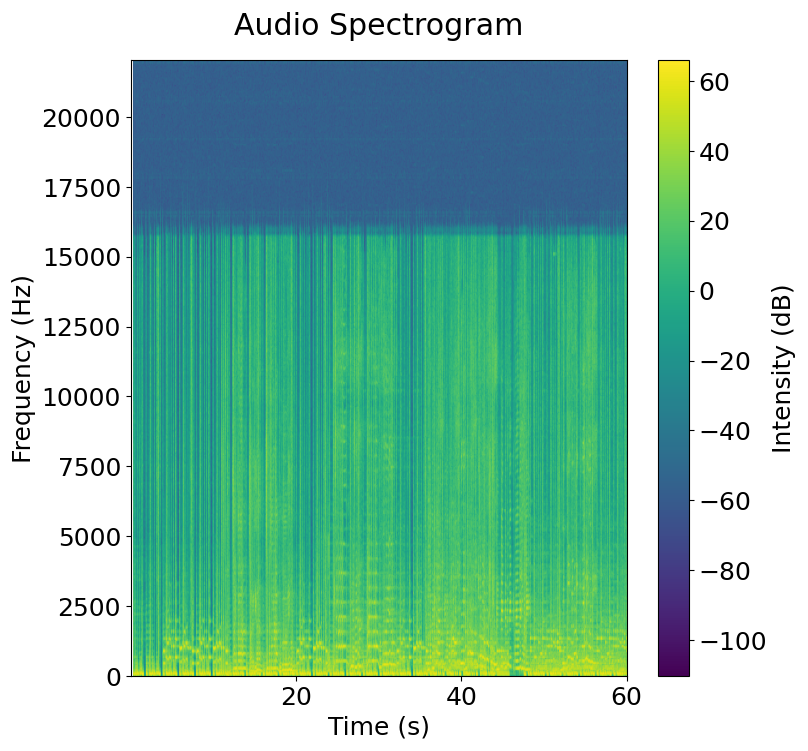

In [221]:
import numpy as np
import matplotlib.pyplot as plt


if snd.ndim == 2:
    snd = snd.mean(axis=1)
spec = plt.specgram(snd, NFFT=1024, Fs=rate)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Audio Spectrogram')
plt.colorbar(label='Intensity (dB)')
plt.show()

In [223]:
import tensorflow as tf
import numpy as np
from PIL import Image

Exception ignored in: <function Wave_write.__del__ at 0x7d2d55e0e3b0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/wave.py", line 326, in __del__
    self.close()
  File "/usr/lib/python3.10/wave.py", line 444, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.10/wave.py", line 467, in _ensure_header_written
    self._write_header(datasize)
  File "/usr/lib/python3.10/wave.py", line 471, in _write_header
    self._file.write(b'RIFF')
ValueError: I/O operation on closed file.


In [226]:
img = Image.open("/content/op.jpg")

In [227]:
imgarray = np.asarray(img)
imgarray.shape

(768, 768, 3)

In [231]:
x_rgb = np.array(Image.open("/content/op.jpg")).astype('float32')
x_rgb = tf.constant(x_rgb)
grays = tf.constant([[0.3],[0.59],[0.11]])
grays = tf.reshape(grays, [1, 1, 3])

In [232]:
grayscale_image = tf.reduce_sum(x_rgb * grays, axis=-1)


In [234]:
grayscale_image = tf.reduce_sum(x_rgb * grays, axis=-1)
grayscale_image = tf.cast(grayscale_image, tf.uint8)


In [235]:
grayscale_image_pil = Image.fromarray(grayscale_image.numpy())
grayscale_image_pil.show()

In [236]:
grayscale_image

<tf.Tensor: shape=(768, 768), dtype=uint8, numpy=
array([[65, 65, 65, ..., 65, 65, 65],
       [49, 49, 49, ..., 56, 56, 56],
       [34, 34, 34, ..., 43, 43, 43],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)>

# ridge and lasso

In [237]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

columns = [
    "class", "alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium",
    "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins",
    "color_intensity", "hue", "OD280_OD315_of_diluted_wines", "proline"
]

# Load the dataset
df = pd.read_csv("/content/wine.data", sep=",", header=None, names=columns)

In [238]:
x = df.iloc[:, [1, 13]].values
y = df.iloc[:, [13]].values


In [239]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [240]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [241]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [242]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [243]:
print("\nRidge Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))


Ridge Regression:
MSE: 8.551804817004218
R2 Score: 0.9999325461968898


In [244]:
print("\nLasso Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))


Lasso Regression:
MSE: 0.01435719013615177
R2 Score: 0.9999998867552409


# Clustering Model Metrics

In [245]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import train_test_split
import pandas as pd


In [246]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [248]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=10, random_state=42)

In [249]:
y_pred = kmeans.predict(X_test)

In [251]:
kmeans.labels_


array([4, 8, 0, ..., 4, 8, 6], dtype=int32)

# New Section